In [18]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [19]:
#fetch data
mydata = pd.read_csv("2019-Dec.csv")

In [20]:
mydata.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [21]:
mydata.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1434380,2019-12-11 18:51:04 UTC,view,5773605,1487580006317032337,NaN,irisk,1.90,532341294,2c1882b8-51c7-41d5-b8d2-aedc28451958
1434381,2019-12-11 18:51:04 UTC,view,5635071,1487580005754995573,NaN,NaN,4.44,585485829,a99085aa-e020-4d95-b8a8-f168089e25e4
1434382,2019-12-11 18:51:05 UTC,cart,5809315,1487580007675986893,NaN,bpw.style,0.95,491025906,6fea5813-421a-4fbb-817b-5d839f151f43
1434383,2019-12-11 18:51:05 UTC,view,4967,1487580008187692007,NaN,runail,2.41,583908395,4b5e05da-4475-4ed4-95fe-d01a88a2786a
1434384,2019-12-11 18:51:05 UTC,view,5909810,1487580013950664926,NaN,NaN,18.73,585509462,337a9


In [22]:
mydata.shape

(1434385, 9)

In [23]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434385 entries, 0 to 1434384
Data columns (total 9 columns):
event_time       1434385 non-null object
event_type       1434385 non-null object
product_id       1434385 non-null int64
category_id      1434385 non-null int64
category_code    24160 non-null object
brand            829100 non-null object
price            1434385 non-null float64
user_id          1434385 non-null int64
user_session     1434079 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 98.5+ MB


In [24]:
mydata.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1410225
brand             605285
price                  0
user_id                0
user_session         306
dtype: int64

**Handling missing Values** 


In [25]:
#fill null values
mydata['price'].fillna(mydata['price'].mean(), inplace = True)

In [26]:
#drop features that not gonna be used in the analysis 
mydata=mydata.drop(['category_code','user_session'], axis=1)

In [27]:
mydata.dropna(inplace=True)

In [28]:
mydata.isnull().sum()

event_time     0
event_type     0
product_id     0
category_id    0
brand          0
price          0
user_id        0
dtype: int64

In [29]:
#change the data type from obj to date and time
mydata['event_time']= pd.to_datetime(mydata['event_time'])

In [30]:
#add some columns for each transaction 
mydata['Year'] = mydata['event_time'].dt.year
mydata['Month'] = mydata['event_time'].dt.month
mydata['Day'] = mydata['event_time'].dt.day
mydata['Time'] = mydata['event_time'].dt.time
mydata.drop(columns='event_time', inplace= True)

**Cleaning the data a little bit more** 


In [31]:
mydata=mydata[['user_id','event_type','Year','Month','Day','Time','brand','category_id','product_id','price']]

In [32]:
mydata.sample(5)

,user_id,event_type,Year,Month,Day,Time,brand,category_id,product_id,price
1298019,457507262,cart,2019,12,10,19:41:07,runail,1487580012096782476,5823277,3.17
1214508,575952838,cart,2019,12,10,09:34:06,ingarden,1487580005713052531,5883100,4.44
691530,377283605,purchase,2019,12,6,08:30:41,irisk,1487580007675986893,5896719,0.63
1056132,584197122,cart,2019,12,9,10:05:01,elizavecca,1487580011702517887,5863109,15.71
96721,442587706,view,2019,12,1,18:34:57,cosmoprofi,1783999064103190764,5868795,6.35


#   Exploratory Data Analysis

**Data Visulization answering some bussiness questions**

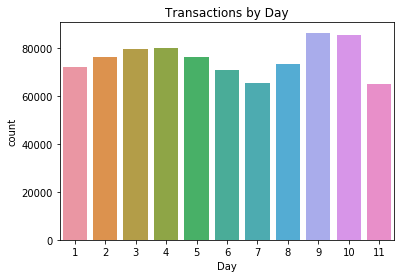

In [22]:
#how many transacion per day?
ax=sns.countplot(x='Day', data=mydata)

plt.xlabel('Day')
plt.title('Transactions by Day')
plt.savefig('Day.png')


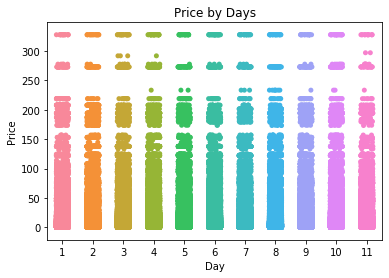

In [35]:
sns.stripplot(x='Day',y='price',data=mydata,jitter=0.2)
plt.xlabel('Day')
plt.ylabel('Price')

plt.title('Price by Days')
plt.savefig('Day-Price.png')


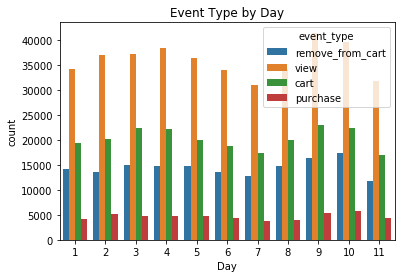

In [51]:
ax=sns.countplot(x='Day', hue='event_type',data=mydata)

plt.xlabel('Day')
plt.title('Event Type by Day')
plt.savefig('event-Day.png')


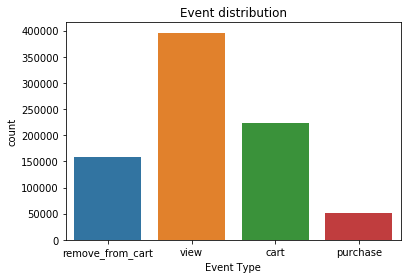

In [47]:
sns.countplot(x='event_type',data=mydata)
plt.xlabel('Event Type')

plt.title('Event distribution')
plt.savefig('event type.png')

In [85]:
mydata['event_type'].value_counts(normalize=True)

view                0.477431
cart                0.269304
remove_from_cart    0.192050
purchase            0.061215
Name: event_type, dtype: float64

**How much did we profit ?**


In [39]:
totalSales=mydata[mydata['event_type']=='purchase'].price.sum()
totalSales=round(totalSales)

In [40]:
totalSales

247115.0

**Create a copy from the data but focusing on purchased events only**

In [49]:
df= mydata[mydata['event_type']=='purchase']

In [42]:
mydata['brand'].value_counts(normalize=True)

runail          0.126419
irisk           0.075882
masura          0.075653
grattol         0.073007
bpw.style       0.048202
                  ...   
invisibobble    0.000004
cuccio          0.000001
ibd             0.000001
ikoo            0.000001
voesh           0.000001
Name: brand, Length: 240, dtype: float64

In [91]:
d=mydata['brand'].value_counts(normalize=True)
d=d[:10]

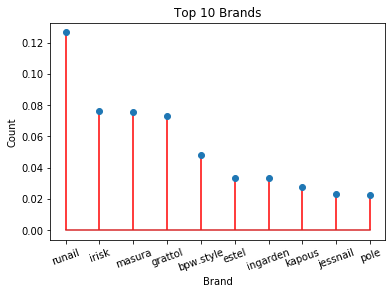

In [95]:
plt.stem(d.index,d.values,use_line_collection=True,linefmt='red')
plt.xticks(rotation=20)
plt.xlabel('Brand')
plt.ylabel('Count')

plt.title('Top 10 Brands')
plt.savefig('brand.png')

In [72]:
#mydata.nsmallest(10, ['brand']) 
u=mydata['brand'].value_counts()
u=u.sort_values(ascending=True)
u=u[:10]

In [73]:
u

ibd             1
ikoo            1
voesh           1
cuccio          1
bodipure        3
helloganic      3
embryolisse     3
essie           3
lunaris         3
invisibobble    3
Name: brand, dtype: int64

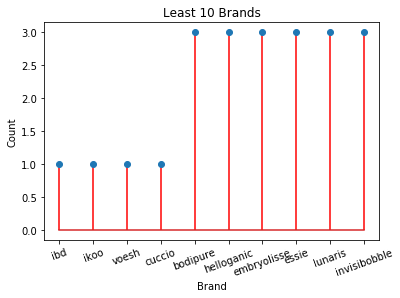

In [77]:
plt.stem(u.index,u.values,use_line_collection=True,linefmt='red')
plt.xticks(rotation=20)
plt.xlabel('Brand')
plt.ylabel('Count')

plt.title('Least 10 Brands')
plt.savefig('brand-least.png')

In [52]:
h=mydata['category_id'].value_counts(normalize=True)
h=h[:10]

In [86]:
h

1487580007675986893    0.087011
1487580005671109489    0.061003
1602943681873052386    0.054457
1487580005092295511    0.037846
1487580013841613016    0.028579
1487580005134238553    0.027521
1487580006300255120    0.023855
1487580008246412266    0.022494
1487580005713052531    0.018495
1487580009286598681    0.017396
Name: category_id, dtype: float64

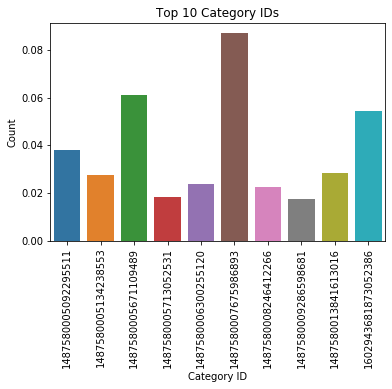

In [65]:
sns.barplot(h.index,h.values)
plt.xticks(rotation=90)
plt.xlabel('Category ID')
plt.ylabel('Count')

plt.title('Top 10 Category IDs')
plt.savefig('category_id.png')

In [23]:
n=mydata['product_id'].value_counts()
n=n[:10]

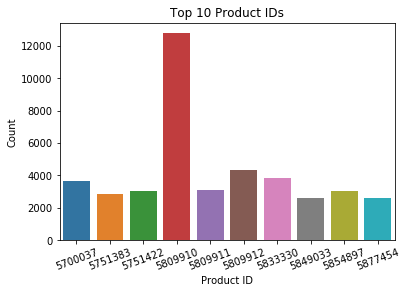

In [25]:
sns.barplot(n.index,n.values)
plt.xticks(rotation=20)
plt.xlabel('Product ID')
plt.ylabel('Count')

plt.title('Top 10 Product IDs')
plt.savefig('product.png')

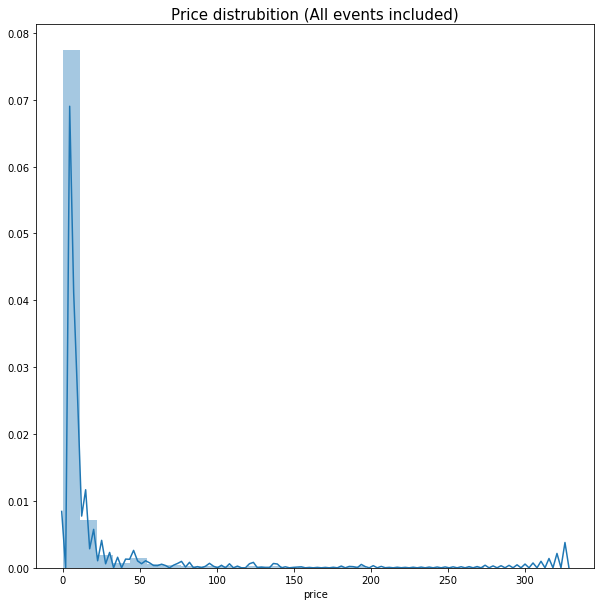

In [118]:
plt.figure(figsize=(10,10))

sns.distplot(mydata['price'],bins=30)
plt.title('Price distrubition (All events included)',fontsize=15)
plt.savefig('price-all.png')

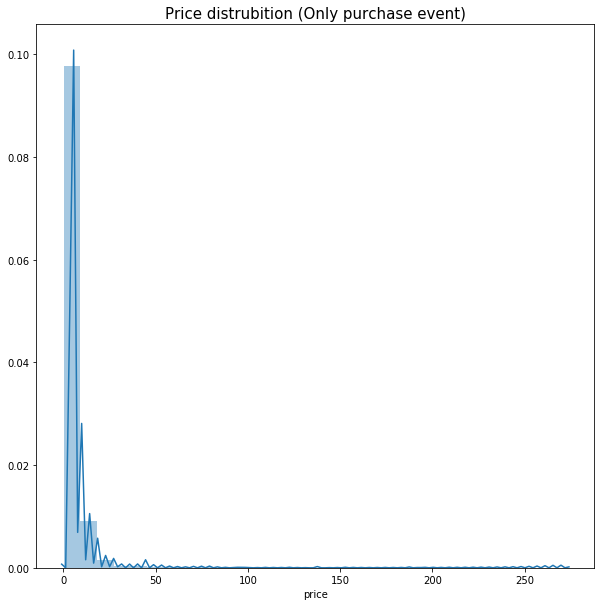

In [119]:
plt.figure(figsize=(10,10))

sns.distplot(df['price'],bins=30)
plt.title('Price distrubition (Only purchase event)',fontsize=15)
plt.savefig('price-purchase event.png')

In [157]:
# What is the total of sales, purchased events only, by each brand
grouped_single = df.groupby('brand').agg({'price': ['sum','mean', 'min', 'max']})


In [158]:
grouped_single

price                          
                sum       mean    min     max
brand                                        
airnails    2200.41   3.189000   0.76  107.94
almea        283.63  28.363000   4.60   79.21
ardell       343.32   6.242182   4.17    8.87
art-visage   793.45   2.764634   1.59    5.24
artex        983.45   9.366190   3.97   15.08
...             ...        ...    ...     ...
yoko        3187.21   6.883823   0.59   22.00
ypsed        133.82  26.764000  19.16   49.29
yu-r         185.70  37.140000  33.33   39.68
zeitun       317.34  10.942759   5.48   16.98
zinger      2169.05   4.269783   0.40   20.32

[196 rows x 4 columns]

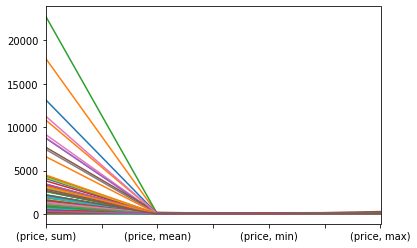

In [175]:
grouped_single.T.plot()
plt.legend('',frameon=False)
plt.title('Price distrubition (Only purchase event)',fontsize=15)
plt.savefig('price-purchase event.png')

In [176]:
w = pd.DataFrame(grouped_single) 


In [177]:
w

price                          
                sum       mean    min     max
brand                                        
airnails    2200.41   3.189000   0.76  107.94
almea        283.63  28.363000   4.60   79.21
ardell       343.32   6.242182   4.17    8.87
art-visage   793.45   2.764634   1.59    5.24
artex        983.45   9.366190   3.97   15.08
...             ...        ...    ...     ...
yoko        3187.21   6.883823   0.59   22.00
ypsed        133.82  26.764000  19.16   49.29
yu-r         185.70  37.140000  33.33   39.68
zeitun       317.34  10.942759   5.48   16.98
zinger      2169.05   4.269783   0.40   20.32

[196 rows x 4 columns]

In [180]:
#to attach it to the presentation as a excel file 
w.to_csv (r'export_dataframe.csv', index = True, header=True)


In [181]:
df.sample(5)

,user_id,event_type,Year,Month,Day,Time,brand,category_id,product_id,price
1225092,397794622,purchase,2019,12,10,10:50:31,nefertiti,2093602042093240877,5878254,5.56
1180831,574363546,purchase,2019,12,10,04:31:41,grattol,1897124478404526487,5858115,4.44
1214836,542507677,purchase,2019,12,10,09:36:10,nitrile,2007399943458784057,5889696,9.52
922052,454905089,purchase,2019,12,8,09:32:01,bpw.style,1487580007675986893,5833335,1.59
875309,538148361,purchase,2019,12,7,19:35:01,irisk,1487580009445982239,5810157,1.43


In [215]:
#Top 10 customers with most num of orders(purchases)
c=df['user_id'].value_counts()
c=c[:10]

In [214]:
c 

517825140    0.003487
575709540    0.003310
471099630    0.002837
579751441    0.002837
551061129    0.002207
408014076    0.001576
493840329    0.001537
564420230    0.001438
268843016    0.001399
580999543    0.001399
Name: user_id, dtype: float64

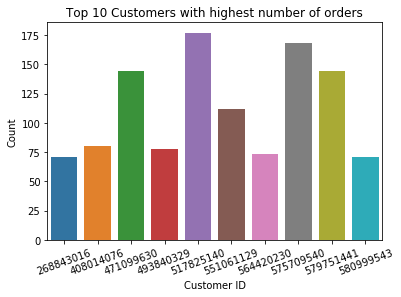

In [211]:
sns.barplot(c.index,c.values)
plt.xticks(rotation=20)
plt.xlabel('Customer ID')
plt.ylabel('Count')

plt.title('Top 10 Customers with highest number of orders')
plt.savefig('customer.png')

In [207]:
#Top 5 customers with highest money spent
r=df.groupby(['user_id'])['price'].sum()
r=r.sort_values(ascending=False)
r=r[:10]

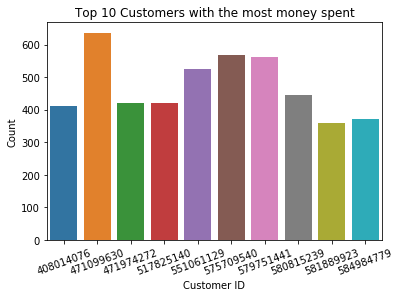

In [212]:
sns.barplot(r.index,r.values)
plt.xticks(rotation=20)
plt.xlabel('Customer ID')
plt.ylabel('Count')

plt.title('Top 10 Customers with the most money spent')
plt.savefig('customer1.png')

In [226]:
brand=df['brand'].value_counts()
brand=brand[:10]

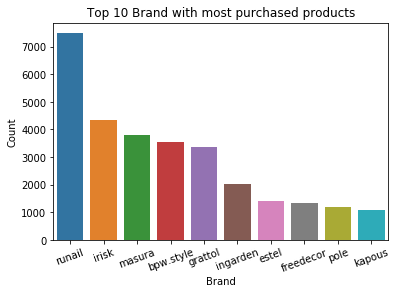

In [236]:
sns.barplot(brand.index,brand.values)
plt.xticks(rotation=20)
plt.xlabel('Brand')
plt.ylabel('Count')

plt.title('Top 10 Brand with most purchased products')
plt.savefig('brands-product.png')

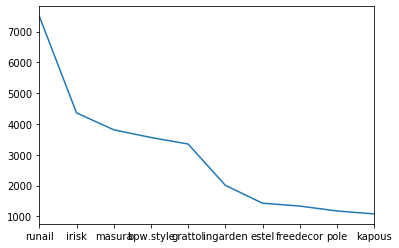

In [228]:
brand.T.plot()

In [239]:
e=mydata.groupby(['brand'])['product_id'].count()
e=e.sort_values(ascending=False)
e=e[:10]

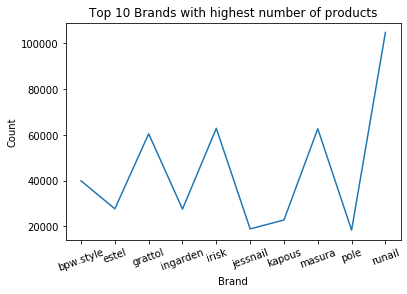

In [248]:
#brands and their products (original data)
sns.lineplot(e.index,e.values)
plt.xticks(rotation=20)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Brands with highest number of products')
plt.savefig('brands their products.png')

In [240]:
q=df.groupby(['brand'])['product_id'].count()
q=q.sort_values(ascending=False)
q=q[:10]

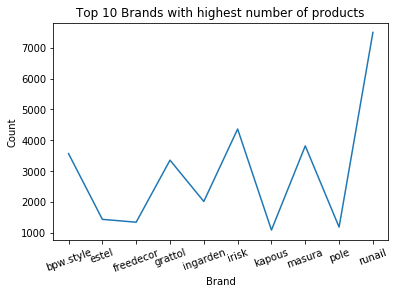

In [249]:
#brands and their products ( data with purchased events only)
sns.lineplot(q.index,q.values)
plt.xticks(rotation=20)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Brands with highest number of products')
plt.savefig('brands their products1.png')

In [251]:
#top 10 brands by their total sales
TotalSalesbtBrand=df.groupby(['brand'])['price'].sum()
TotalSalesbtBrand=TotalSalesbtBrand.sort_values(ascending=False)
TotalSalesbtBrand=TotalSalesbtBrand[:10]

In [252]:
TotalSalesbtBrand

brand
runail      22784.65
grattol     17924.58
irisk       13159.13
uno         11269.55
masura      10821.65
ingarden     9150.45
estel        8782.87
jessnail     8733.97
strong       7684.08
cnd          7440.17
Name: price, dtype: float64

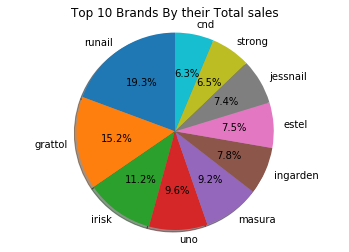

In [268]:
fig1, ax1 = plt.subplots()
ax1.pie(TotalSalesbtBrand.values,labels=TotalSalesbtBrand.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Brands By their Total sales')
plt.savefig('brands their sales.png')

In [276]:
#transactions per day 
day=df['Day'].value_counts()

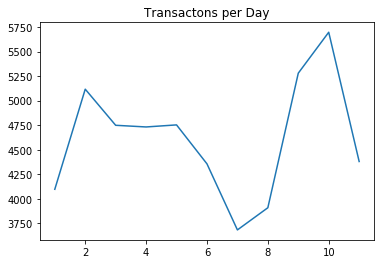

In [279]:
sns.lineplot(day.index,day.values)
plt.title('Transactons per Day')
plt.savefig('transaction per day-purchase.png')

In [281]:
#total sales per day
total=df.groupby(['Day'])['price'].sum()
total=total.sort_values(ascending=False)

In [283]:
total

Day
10    28224.55
9     26759.19
2     24345.36
4     24195.70
3     23103.22
5     22696.39
6     21626.37
11    21232.57
8     19365.95
1     18980.24
7     16585.44
Name: price, dtype: float64

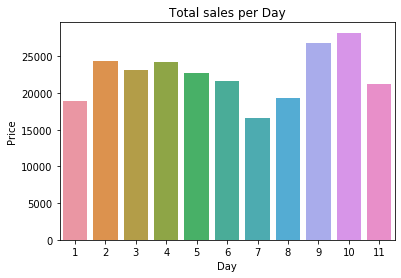

In [284]:
sns.barplot(total.index,total.values)
plt.xlabel('Day')
plt.ylabel('Price')

plt.title('Total sales per Day')
plt.savefig('sales per day.png')

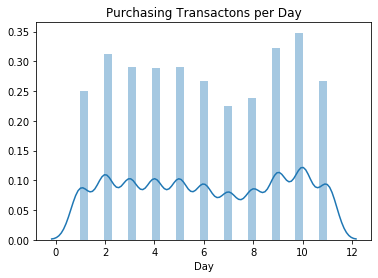

In [342]:
sns.distplot(df['Day'])
plt.title('Purchasing Transactons per Day')
plt.savefig('transaction per day-purchase1.png')

In [296]:
df.to_csv (r'data.csv', index = True, header=True)


In [301]:
#day vs category (trying to find the most frequent category purchased by each day)
df.groupby('Day')['category_id'].apply(lambda x: x.value_counts().index[0])

Day
1     1487580007675986893
2     1487580007675986893
3     1487580007675986893
4     1487580007675986893
5     1487580007675986893
6     1487580007675986893
7     1487580007675986893
8     1487580007675986893
9     1487580007675986893
10    1487580007675986893
11    1487580007675986893
Name: category_id, dtype: int64